# Assessment 2: Machine Learning and Optimisation

## PART 2 – OPTIMISATION

### Task 2.1 – Generation of random solutions

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#### Example Objective Function (Schaffer N.2)

In [2]:
def schaffer(x, y):
    numerator = (np.sin(x**2 - y**2))**2 - 0.5
    denominator = (1 + 0.001*(x**2 + y**2))**2
    return 0.5 + numerator / denominator

#### Generate 500 random solutions and plot them

In [3]:
# Generate 500 random (x, y) pairs in [-5, 5]
num_solutions = 500
solutions = []
for _ in range(num_solutions):
    x = np.random.uniform(-5, 5)
    y = np.random.uniform(-5, 5)
    solutions.append((x, y))

In [4]:
# Calculate fitness for each solution using the Schaffer function
fitnesses = [schaffer(x, y) for (x, y) in solutions]

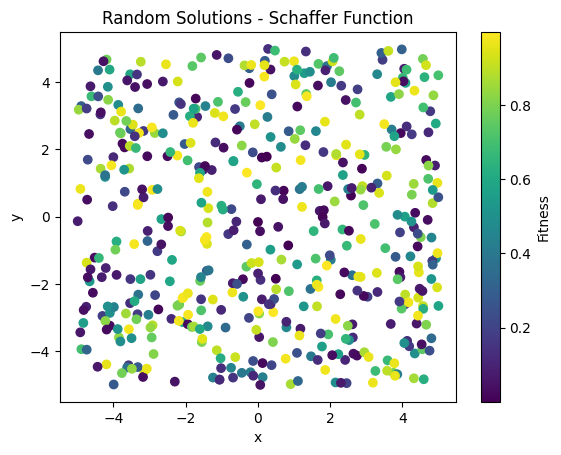

In [5]:
# Plot the solutions, color-coded by their fitness values
plt.scatter([s[0] for s in solutions],
            [s[1] for s in solutions],
            c=fitnesses, cmap='viridis')
plt.colorbar(label='Fitness')
plt.title('Random Solutions - Schaffer Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Task 2.2 – Algorithm implementation

In [10]:
# Import necessary libraries
import random

In [11]:
# Generate Initial Population
def generate_population(pop_size=20, lower=-5, upper=5):
    return [(np.random.uniform(lower, upper),
             np.random.uniform(lower, upper)) for _ in range(pop_size)]

In [12]:
# Uniform Crossover
def uniform_crossover(parent1, parent2):
    child1, child2 = [], []
    for p1, p2 in zip(parent1, parent2):
        if random.random() < 0.5:
            child1.append(p1)
            child2.append(p2)
        else:
            child1.append(p2)
            child2.append(p1)
    return tuple(child1), tuple(child2)

In [13]:
# Additive Gaussian Mutation
def mutate(individual, mutation_rate=0.1, mutation_std=0.1, lower=-5, upper=5):
    x, y = individual
    if random.random() < mutation_rate:
        x += np.random.normal(0, mutation_std)
    if random.random() < mutation_rate:
        y += np.random.normal(0, mutation_std)
    # Clip to bounds
    x = np.clip(x, lower, upper)
    y = np.clip(y, lower, upper)
    return (x, y)

In [14]:
# Evaluate Population Fitness
def evaluate_population(population, func):
    return [func(x, y) for (x, y) in population]

In [15]:
# Selection Operator (Elitist)
def select_next_generation(parents, offspring, func, pop_size):
    combined = parents + offspring
    fitness_vals = evaluate_population(combined, func)
    sorted_indices = np.argsort(fitness_vals)  # ascending (lower = better)
    best_indices = sorted_indices[:pop_size]
    return [combined[i] for i in best_indices]

In [16]:
# Main Evolutionary Algorithm
def evolutionary_algorithm(
    func, pop_size=20, generations=30, crossover_rate=0.9,
    mutation_rate=0.1, mutation_std=0.1, lower=-5, upper=5
):
    """
    Population-based EA with:
      - Uniform crossover
      - Additive Gaussian mutation
      - Elitist selection (parents + offspring -> best pop_size)
    Tracks fitness values in a fitness archive for verification.
    """
    # 1. Initialize population
    population = generate_population(pop_size, lower, upper)

    # Fitness archive: generation -> list of fitness values
    fitness_archive = {}

    for gen in range(generations):
        # Evaluate current population and store in archive
        fitness_values = evaluate_population(population, func)
        fitness_archive[gen] = fitness_values

        # Create offspring
        offspring = []
        while len(offspring) < pop_size:
            # Select two random parents
            parent1 = random.choice(population)
            parent2 = random.choice(population)

            # Perform crossover
            if random.random() < crossover_rate:
                child1, child2 = uniform_crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2

            # Mutate children
            child1 = mutate(child1, mutation_rate, mutation_std, lower, upper)
            child2 = mutate(child2, mutation_rate, mutation_std, lower, upper)

            offspring.append(child1)
            offspring.append(child2)

        # Select next generation
        population = select_next_generation(population, offspring, func, pop_size)

    # Final evaluation and storage
    final_fitness = evaluate_population(population, func)
    fitness_archive[generations] = final_fitness

    # Identify best solution in final population
    best_index = np.argmin(final_fitness)
    best_individual = population[best_index]
    best_fit = final_fitness[best_index]

    return population, best_individual, best_fit, fitness_archive

In [17]:
# Example Usage
if __name__ == "__main__":
    # Demonstration with the Schaffer function
    final_pop, best_ind, best_fit, fitness_log = evolutionary_algorithm(
        func=schaffer,
        pop_size=20,
        generations=30,
        crossover_rate=0.9,
        mutation_rate=0.1,
        mutation_std=0.1,
        lower=-5,
        upper=5
    )

    print("Best individual found:", best_ind)
    print("Best fitness:", best_fit)
    print("\nFitness Archive Keys (Generations):", fitness_log.keys())

Best individual found: (np.float64(1.0261596915517304), np.float64(-1.0251758449446717))
Best fitness: 0.0021014236865656843

Fitness Archive Keys (Generations): dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


### Task 2.3 – Visualisation of results

In [18]:
# Helper Functions from Task 2.2
def generate_population(pop_size=20, lower=-5, upper=5):
    """Creates a list of random (x, y) solutions in [lower, upper]."""
    return [(np.random.uniform(lower, upper),
             np.random.uniform(lower, upper)) for _ in range(pop_size)]

def uniform_crossover(parent1, parent2):
    """Performs uniform crossover with 50% chance to swap each coordinate."""
    child1, child2 = [], []
    for p1, p2 in zip(parent1, parent2):
        if random.random() < 0.5:
            child1.append(p1)
            child2.append(p2)
        else:
            child1.append(p2)
            child2.append(p1)
    return tuple(child1), tuple(child2)

def mutate(individual, mutation_rate=0.1, mutation_std=0.1, lower=-5, upper=5):
    """Adds Gaussian noise to each coordinate with a given mutation_rate."""
    x, y = individual
    if random.random() < mutation_rate:
        x += np.random.normal(0, mutation_std)
    if random.random() < mutation_rate:
        y += np.random.normal(0, mutation_std)
    # Clip to [lower, upper]
    x = np.clip(x, lower, upper)
    y = np.clip(y, lower, upper)
    return (x, y)

def evaluate_population(population, func):
    """Returns a list of fitness values for the population."""
    return [func(x, y) for (x, y) in population]

def select_next_generation(parents, offspring, func, pop_size):
    """
    Combines parent + offspring, sorts by ascending fitness,
    and returns the best pop_size individuals.
    """
    combined = parents + offspring
    fitness_vals = evaluate_population(combined, func)
    sorted_indices = np.argsort(fitness_vals)  # lower = better
    best_indices = sorted_indices[:pop_size]
    return [combined[i] for i in best_indices]


In [19]:
# Evolutionary Algorithm with Average Fitness Tracking
def evolutionary_algorithm(
    func, pop_size=20, generations=30, crossover_rate=0.9,
    mutation_rate=0.1, mutation_std=0.1, lower=-5, upper=5
):
    """
    Modified EA that records the average fitness each generation.
    Returns final population, best individual, best fitness,
    and a list of average fitness values over time.
    """
    # Initialize population
    population = generate_population(pop_size, lower, upper)
    avg_fitness_per_gen = []

    for gen in range(generations):
        # Evaluate current population
        fitness_values = evaluate_population(population, func)
        avg_fitness = np.mean(fitness_values)
        avg_fitness_per_gen.append(avg_fitness)

        # Generate offspring
        offspring = []
        while len(offspring) < pop_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)

            if random.random() < crossover_rate:
                child1, child2 = uniform_crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2

            child1 = mutate(child1, mutation_rate, mutation_std, lower, upper)
            child2 = mutate(child2, mutation_rate, mutation_std, lower, upper)

            offspring.append(child1)
            offspring.append(child2)

        # Select next generation
        population = select_next_generation(population, offspring, func, pop_size)

    # Final evaluation
    final_fitness = evaluate_population(population, func)
    best_index = np.argmin(final_fitness)
    best_individual = population[best_index]
    best_fitness = final_fitness[best_index]

    return population, best_individual, best_fitness, avg_fitness_per_gen

In [20]:
# Task 2.3: Plotting Average Fitness (Separate from the EA)
def plot_average_fitness(avg_fitness_list, title="Evolution of Average Fitness"):
    """Plots the average fitness over the generations."""
    plt.plot(range(len(avg_fitness_list)), avg_fitness_list, marker='o')
    plt.xlabel("Generation")
    plt.ylabel("Average Fitness")
    plt.title(title)
    plt.show()

Best Individual: (np.float64(1.4020679633323443), np.float64(-1.3998779765758917))
Best Fitness: 0.003939818438977449
Average Fitnesses: [np.float64(0.4885246955061245), np.float64(0.16408539325261667), np.float64(0.07738129567289771), np.float64(0.050043540258095744), np.float64(0.024814076448412915), np.float64(0.018039530283368133), np.float64(0.013694294050210817), np.float64(0.013022600526801514), np.float64(0.01103932574169395), np.float64(0.007317425889795068), np.float64(0.005896843350065464), np.float64(0.004886449656425271), np.float64(0.004521842747544344), np.float64(0.004485015286506214), np.float64(0.004374532903391823), np.float64(0.004245636789758367), np.float64(0.004245636789758367), np.float64(0.004245636789758367), np.float64(0.004245636789758367), np.float64(0.004230345872219321), np.float64(0.004215054954680275), np.float64(0.0041691822020631375), np.float64(0.004047453068115009), np.float64(0.0039557075628807335), np.float64(0.003939818438977449), np.float64(0.00

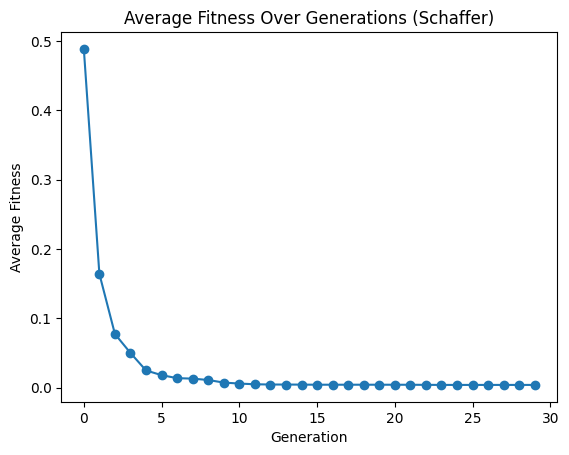

In [22]:
# Example Usage
if __name__ == "__main__":
    # Choose an objective function, e.g., Schaffer
    final_pop, best_ind, best_fit, avg_fitnesses = evolutionary_algorithm(
        func=schaffer,
        pop_size=20,
        generations=30,
        crossover_rate=0.9,
        mutation_rate=0.1,
        mutation_std=0.1,
        lower=-5,
        upper=5
    )

    print("Best Individual:", best_ind)
    print("Best Fitness:", best_fit)
    print("Average Fitnesses:", avg_fitnesses)

    # Plot the average fitness per generation (Task 2.3)
    plot_average_fitness(avg_fitnesses, title="Average Fitness Over Generations (Schaffer)")